In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score , confusion_matrix

import itertools
from google.colab import drive
import os

# This will prompt for authorization.
drive.mount('/content/drive')

# Specify the path to your folder
folder_path = '/content/drive/My Drive/Final Training Data'
dataPath= os.path.join(os.getcwd(), 'drive', 'My Drive', 'Final Training Data')
# Define the base directory where your class folders are located
base_dir = dataPath

# Define the destination base directories
train_dir = os.path.join(dataPath, "Train")
test_dir = os.path.join(dataPath, "Test")
valid_dir = os.path.join(dataPath, "Valid")

BATCH_SIZE = 32
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
train_dataset = keras.utils.image_dataset_from_directory(
    os.path.join(dataPath, 'Train'),
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical'
)

valid_dataset = keras.utils.image_dataset_from_directory(
    os.path.join(dataPath, 'Valid'),
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical'
)

test_dataset = keras.utils.image_dataset_from_directory(
    os.path.join(dataPath, 'Test'),
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical',
    shuffle=False
)

Mounted at /content/drive
Found 9600 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.


In [5]:
from google.colab import drive
import os

# This will prompt for authorization.
drive.mount('/content/drive')

# Specify the path to your folder
folder_path = '/content/drive/My Drive/Final Training Data'

Mounted at /content/drive
Files in folder '/content/drive/My Drive/Final Training Data':
Leaf Blight
Black Rot
Healthy
ESCA
Train
Valid
Test
models


In [7]:
dataPath= os.path.join(os.getcwd(), 'drive', 'My Drive', 'Final Training Data')
diseases = os.listdir(dataPath)
nums = {}
for d in diseases:
  nums[d] = len(os.listdir(os.path.join(dataPath, d)))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Leaf Blight,3000
Black Rot,3000
Healthy,3000
ESCA,3000
Train,4
Valid,4
Test,4
models,1


In [11]:
# Define the base directory where your class folders are located
base_dir = dataPath

# Define the destination base directories
train_dir = os.path.join(dataPath, "Train")
test_dir = os.path.join(dataPath, "Test")
valid_dir = os.path.join(dataPath, "Valid")

test_dir

'/content/drive/My Drive/Final Training Data/Test'

In [3]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
train_dataset = keras.utils.image_dataset_from_directory(
    os.path.join(dataPath, 'Train'),
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical'
)

valid_dataset = keras.utils.image_dataset_from_directory(
    os.path.join(dataPath, 'Valid'),
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical'
)

test_dataset = keras.utils.image_dataset_from_directory(
    os.path.join(dataPath, 'Test'),
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical',
    shuffle=False
)

Found 9600 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.


In [3]:
from tensorflow.keras import models
from keras.layers import Dense, Dropout, Flatten
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"), # Applies horizontal flipping to a random 50% of the images
  layers.RandomRotation(0.1), # Rotates the input images by a random value in the range[–10%, +10%] (fraction of full circle [-36°, 36°])
  layers.RandomZoom(0.1), # Zooms in or out of the image by a random factor in the range [-20%, +20%]
  layers.RandomContrast(0.1),
],
name = "AugmentationLayer"
)

model = keras.Sequential(name="FromScratch")
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32, kernel_size = 3, activation = "relu6", padding = "same", input_shape = (256, 256,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(4,activation="softmax"))

model.build(input_shape=(None, 256, 256, 3))
model.add(Flatten())
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "FromScratch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AugmentationLayer (Sequent  (None, 256, 256, 3)       0         
 ial)                                                            
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                       

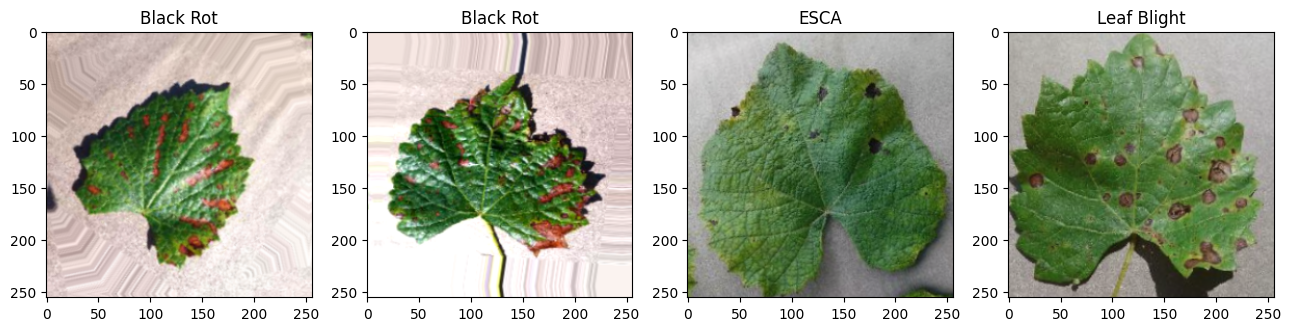

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for images, y_batch in train_dataset.take(1):
    for i in range(4):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(diseases[np.where(y_batch[i]==1)[0][0]])

In [10]:
modelName = "32relu6_64_128_256_512_512_Drp_256d"
scratchPath=scratchPath = os.path.join(dataPath, 'models', 'from_scratch')
modelPath = os.path.join(scratchPath, modelName + ".keras")

save_best_model = tf.keras.callbacks.ModelCheckpoint(modelPath, verbose=True, monitor='val_loss', save_best_only=True, save_weights_only=True)

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    validation_steps=len(valid_dataset),
    callbacks=[earlyStopping, save_best_model]
  )

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.8385
Epoch 1: val_loss improved from inf to 7.91153, saving model to /content/drive/My Drive/Final Training Data/models/from_scratch/32relu6_64_128_256_512_512_Drp_256d.keras
300/300 [==============================] - 1444s 5s/step - loss: 0.5550 - accuracy: 0.8385 - val_loss: 7.9115 - val_accuracy: 0.4250
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9426
Epoch 2: val_loss improved from 7.91153 to 0.79499, saving model to /content/drive/My Drive/Final Training Data/models/from_scratch/32relu6_64_128_256_512_512_Drp_256d.keras
300/300 [==============================] - 51s 168ms/step - loss: 0.1852 - accuracy: 0.9426 - val_loss: 0.7950 - val_accuracy: 0.8258
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9522
Epoch 3: val_loss improved from 0.79499 to 0.48316, saving model to /content/drive/My Drive/Final Tra

In [2]:
import tensorflow as tf
import os
BATCH_SIZE = 32
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
# Define your model architecture here exactly as it was defined before training
from tensorflow.keras import models
from keras.layers import Dense, Dropout, Flatten
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"), # Applies horizontal flipping to a random 50% of the images
  layers.RandomRotation(0.1), # Rotates the input images by a random value in the range[–10%, +10%] (fraction of full circle [-36°, 36°])
  layers.RandomZoom(0.1), # Zooms in or out of the image by a random factor in the range [-20%, +20%]
  layers.RandomContrast(0.1),
],
name = "AugmentationLayer"
)

model = keras.Sequential(name="FromScratch")
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32, kernel_size = 3, activation = "relu6", padding = "same", input_shape = (256, 256,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, kernel_size = 3, activation='relu', padding = "same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(4,activation="softmax"))

model.build(input_shape=(None, 256, 256, 3))
model.add(Flatten())
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

# Path to the saved weights
modelName = "32relu6_64_128_256_512_512_Drp_256d"
scratchPath = os.path.join(dataPath, 'models', 'from_scratch')
modelPath = os.path.join(scratchPath, modelName + ".keras")

# Load the weights
model.load_weights(modelPath)

Model: "FromScratch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AugmentationLayer (Sequent  (None, 256, 256, 3)       0         
 ial)                                                            
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                       

In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Evaluate on validation dataset
val_loss, val_accuracy = model.evaluate(valid_dataset)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")

# If you have a test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)  # Assuming 'test_dataset' is defined
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

38/38 [==============================] - 254s 5s/step - loss: 0.0620 - accuracy: 0.9767
Validation loss: 0.06200501695275307, Validation accuracy: 0.9766666889190674
38/38 [==============================] - 277s 7s/step - loss: 0.0970 - accuracy: 0.9625
Test loss: 0.09699109196662903, Test accuracy: 0.9624999761581421


In [6]:
predictions = model.predict(test_dataset)
# Handle or display your predictions

38/38 [==============================] - 4s 109ms/step


In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Assuming 'model' is your trained model
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = np.array([])
images = np.array([])

for images_batch, labels_batch in test_dataset:
      true_labels=np.concatenate([true_labels, np.argmax(labels_batch.numpy(), axis=1)])


# true_labels and predicted_labels should be numpy arrays
true_labels = true_labels.astype(int)
accuracy = np.mean(true_labels == predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


38/38 [==============================] - 102s 3s/step


ValueError: operands could not be broadcast together with shapes (1200,) (1200,4) 

In [10]:
# true_labels and predicted_labels should be numpy arrays
true_labels = true_labels.astype(int)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(true_labels == predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.25%


In [11]:
cnn_base = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
    pooling='max',
)
cnn_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH),
  layers.Rescaling(1./255)
])

cnn_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', sum(np.prod(x.shape) for x in cnn_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [13]:
pretrained_model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    cnn_base,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(38, activation = 'softmax')
])


pretrained_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"]
)

pretrained_model.build(input_shape=(None, IMAGE_HEIGHT, IMAGE_WIDTH, 3))

pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 AugmentationLayer (Sequent  (None, 256, 256, 3)       0         
 ial)                                                            
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [14]:
modelName = "FE_base_256d"
fExtractorPath = os.path.join(dataPath, 'models', 'feature_extraction')
modelPath = os.path.join(fExtractorPath, modelName + ".keras")

save_best_model = tf.keras.callbacks.ModelCheckpoint(modelPath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=True)

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = pretrained_model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    validation_steps=len(valid_dataset),
    callbacks=[earlyStopping, save_best_model]
  )

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 4) and (None, 38) are incompatible
